In [1]:
import pandas as pd

# Adjust the file path according to your specific file location
file_path = 'C:\\Users\\user\\Downloads\\archive (2)\\german_credit_data_updated.csv'
data = pd.read_csv(file_path)

# Initial look at the data
print(data.head())


   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Credit Risk  
0           1169         6             radio/TV            1  
1           5951        48             radio/TV            2  
2           2096        12            education            1  
3           7882        42  furniture/equipment            1  
4           4870        24                  car            2  


In [2]:
# Drop the 'Unnamed: 0' column
data.drop(columns=['Unnamed: 0'], inplace=True)


In [3]:
# Fill missing values with the most frequent value for 'Saving accounts' and 'Checking account'
for column in ['Saving accounts', 'Checking account']:
    most_frequent = data[column].mode()[0]
    data[column].fillna(most_frequent, inplace=True)


In [4]:
# Encode categorical variables using pd.get_dummies
data_encoded = pd.get_dummies(data, columns=['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'], drop_first=True)

# Check the first few rows of the transformed dataset
print(data_encoded.head())


   Age  Job  Credit amount  Duration  Credit Risk  Sex_male  Housing_own  \
0   67    2           1169         6            1      True         True   
1   22    2           5951        48            2     False         True   
2   49    1           2096        12            1      True         True   
3   45    2           7882        42            1      True        False   
4   53    2           4870        24            2      True        False   

   Housing_rent  Saving accounts_moderate  Saving accounts_quite rich  \
0         False                     False                       False   
1         False                     False                       False   
2         False                     False                       False   
3         False                     False                       False   
4         False                     False                       False   

   Saving accounts_rich  Checking account_moderate  Checking account_rich  \
0                 False    

In [5]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = data_encoded.drop('Credit Risk', axis=1)
y = data_encoded['Credit Risk']

# Split the data - 80% for training and 20% for testing, with a random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the model
logreg = LogisticRegression(max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Calculate the accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')


Logistic Regression Accuracy: 0.7015706806282722


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate the accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


Random Forest Accuracy: 0.680628272251309


In [8]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Fit the model
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Calculate the accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')


Gradient Boosting Accuracy: 0.680628272251309


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Predict on the test set using the best model
y_pred_best = grid_search.predict(X_test)

# Calculate the accuracy of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Test set accuracy of the best model: {accuracy_best}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Best cross-validation accuracy: 0.7156260749914001
Test set accuracy of the best model: 0.675392670157068


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg = LogisticRegression(max_iter=1000)

# Perform 5-fold cross-validation and calculate the average accuracy
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')

# Print the average accuracy and standard deviation
print(f'CV Accuracy: {cv_scores.mean()} ± {cv_scores.std()}')


CV Accuracy: 0.6999140006879945 ± 0.025436110588433945


In [11]:
# Example: Add a new feature representing the ratio of the credit amount to the age of the applicant.
# This could potentially capture the risk associated with the amount of credit relative to the applicant's age.
X_train['Credit_Amount_to_Age_Ratio'] = X_train['Credit amount'] / X_train['Age']
X_test['Credit_Amount_to_Age_Ratio'] = X_test['Credit amount'] / X_test['Age']

# Remember to apply similar transformations to any new features in your dataset for model retraining.


In [13]:
# Assuming the original feature set X and target y have been defined

# Add the new feature 'Credit_Amount_to_Age_Ratio' to both training and test sets
X['Credit_Amount_to_Age_Ratio'] = X['Credit amount'] / X['Age']

# Split the data again to include the new feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you're using any preprocessing steps like scaling or encoding, make sure to apply them again here

# Now retrain your model on the updated training set
gb.fit(X_train, y_train)

# Make predictions with the updated model
y_pred_gb = gb.predict(X_test)

# Evaluate the updated model
# (Using metrics such as accuracy, confusion_matrix, classification_report, etc.)


In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Now, you would use X_resampled and y_resampled for training your models to see if the performance improves.


In [15]:
# Retrain the model with the resampled data
gb.fit(X_resampled, y_resampled)

# Evaluate the model again using the metrics as shown previously


GradientBoostingClassifier(random_state=42)

In [16]:
import pandas as pd

# Assuming `gb` is your trained Gradient Boosting model and `X_train` is your training dataset
feature_importances = gb.feature_importances_

# Create a DataFrame to visualize feature importances
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df)


                        Feature  Importance
2                 Credit amount    0.212776
3                      Duration    0.144887
10    Checking account_moderate    0.130354
19   Credit_Amount_to_Age_Ratio    0.085553
6                  Housing_rent    0.065789
5                   Housing_own    0.064236
12                  Purpose_car    0.056760
0                           Age    0.050899
16             Purpose_radio/TV    0.037876
1                           Job    0.037657
14            Purpose_education    0.036370
7      Saving accounts_moderate    0.019118
15  Purpose_furniture/equipment    0.017954
17              Purpose_repairs    0.008885
11        Checking account_rich    0.007898
9          Saving accounts_rich    0.007818
8    Saving accounts_quite rich    0.005062
4                      Sex_male    0.004766
18      Purpose_vacation/others    0.004291
13  Purpose_domestic appliances    0.001052


In [17]:
pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/39/6c/4ab39615fc3ffe40faaa62fc2feb43868b8ce946c671e84bf476c1e06116/shap-0.45.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tqdm>=4.27.0 from https://files.pythonhosted.org/packages/2a/14/e75e52d521442e2fcc9f1df3c5e456aead034203d4797867980de558ab34/tqdm-4.66.2-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     -------------------- ----------------- 30.7/57.6 kB 186.2 kB/s eta 0:00:01
     ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


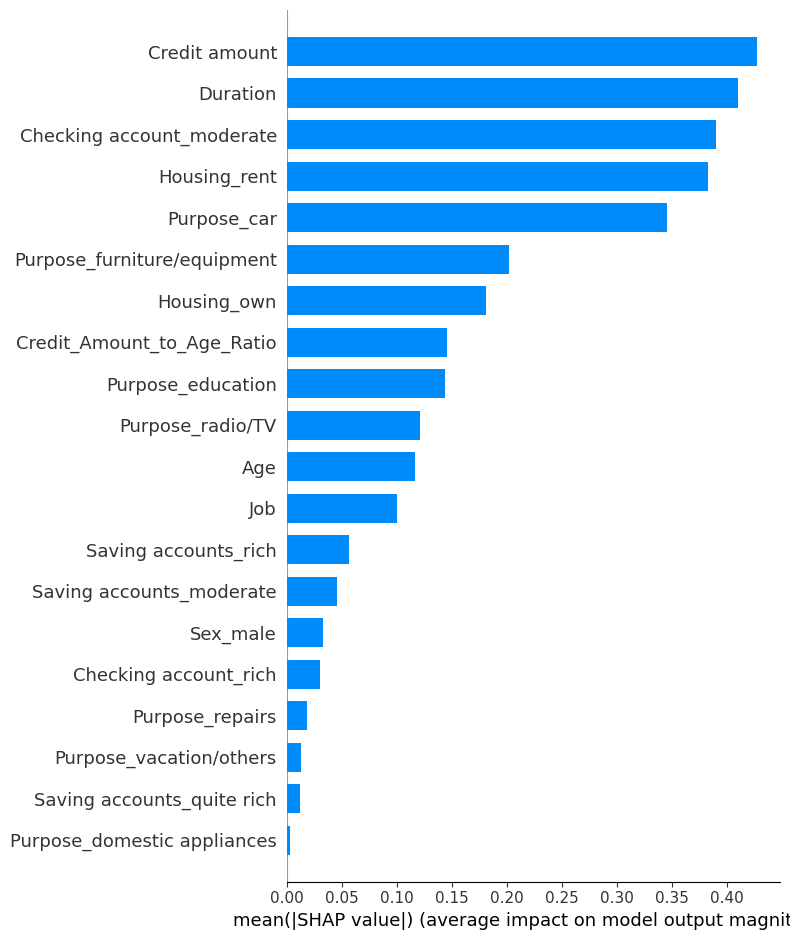

In [18]:
import shap

# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(gb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the summary plot for the SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [19]:
from joblib import dump

# Save the model to a file
dump(gb, 'gradient_boosting_model.joblib')


['gradient_boosting_model.joblib']